# 1. Penentuan Objektif

Perusahaan "AB Corps. Ltd." pada divisi bisnis Ecommerce ingin melakukan Analisa Trend Sales atau Pendapatan Perusahaan dan Permasalahan yang ingin dianalisis adalah sebagai berikut:

* Perusahaan ingin mengetahui produk yang paling diminati oleh pelanggan dari total jumlah order?
* Selain itu meminta produk yang menghasilkan Sales paling tinggi adalah produk apa saja?
* Tren sales dari bulan tahun seperti apa?
* Serta insight-insight lain yang bisa menghasilkan strategi yang efektif untuk meningkatkan Sales 

# 2. Akses ke Dataset

Berikut adalah Dataset yang diambil dari Database perusahaan untuk dilakukan analisis

In [1]:
import sqlite3 as db
import pandas as pd
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
warnings.filterwarnings('ignore')

In [2]:
conn = db.connect('olist.db')

In [3]:
data = pd.read_sql_query("""
SELECT * FROM olist_order_dataset o
LEFT JOIN olist_order_customer_dataset c
ON o.customer_id = c.customer_id
LEFT JOIN olist_order_items_dataset oi
ON o.order_id = oi.order_id
LEFT JOIN olist_order_payments_dataset op
ON o.order_id = op.order_id
LEFT JOIN olist_products_dataset p
ON oi.product_id = p.product_id
LEFT JOIN product_category_name_translation pt
ON p.product_category_name = pt.product_category_name;
"""
,conn)
data.head().T

,0,1,2,3,4
index,0,0,0,1,2
order_id,e481f51cbdc54678b7cc49136f2d6af7,e481f51cbdc54678b7cc49136f2d6af7,e481f51cbdc54678b7cc49136f2d6af7,53cdb2fc8bc7dce0b6741e2150273451,47770eb9100c2d0c44946d9cf07ec65d
customer_id,9ef432eb6251297304e76186b10a928d,9ef432eb6251297304e76186b10a928d,9ef432eb6251297304e76186b10a928d,b0830fb4747a6c6d20dea0b8c802d7ef,41ce2a54c0b03bf3443c3d931a367089
order_status,delivered,delivered,delivered,delivered,delivered
order_purchase_timestamp,2017-10-02 10:56:33,2017-10-02 10:56:33,2017-10-02 10:56:33,2018-07-24 20:41:37,2018-08-08 08:38:49
order_approved_at,2017-10-02 11:07:15,2017-10-02 11:07:15,2017-10-02 11:07:15,2018-07-26 03:24:27,2018-08-08 08:55:23
order_delivered_carrier_date,2017-10-04 19:55:00,2017-10-04 19:55:00,2017-10-04 19:55:00,2018-07-26 14:31:00,2018-08-08 13:50:00
order_delivered_customer_date,2017-10-10 21:25:13,2017-10-10 21:25:13,2017-10-10 21:25:13,2018-08-07 15:27:45,2018-08-17 18:06:29
order_estimated_delivery_date,2017-10-18 00:00:00,2017-10-18 00:00:00,2017-10-18 00:00:00,2018-08-13 00:00:00,2018-09-04 00:00:00
index,70296,70296,70296,77027,554


Kolom yang akan digunakan untuk digunakan untuk Analisis Trend Sales adalah berikut
(Karena Sales atau Pendapatan dianggap ketika barang sudah diterima konsumen maka yang diambil adalah status delivered):

* customer_id
* order_status
* order_delivered_customer_date
* customer_city
* customer_state
* price
* freight_value
* payment_type
* payment_value
* product_category_name_english

Maka akan dilakukan querying kembali untuk mendapatkan kolom tersebut

In [4]:
data = pd.read_sql_query("""
SELECT
o.customer_id, o.order_status, o.order_delivered_customer_date,
c.customer_city, c.customer_state,
oi.price, oi.freight_value,
op.payment_type, op.payment_value,
pt.product_category_name_english
FROM olist_order_dataset o
LEFT JOIN olist_order_customer_dataset c
ON o.customer_id = c.customer_id
LEFT JOIN olist_order_items_dataset oi
ON o.order_id = oi.order_id
LEFT JOIN olist_order_payments_dataset op
ON o.order_id = op.order_id
LEFT JOIN olist_products_dataset p
ON oi.product_id = p.product_id
LEFT JOIN product_category_name_translation pt
ON p.product_category_name = pt.product_category_name; 
"""
,conn)
data.head().T

,0,1,2,3,4
customer_id,9ef432eb6251297304e76186b10a928d,9ef432eb6251297304e76186b10a928d,9ef432eb6251297304e76186b10a928d,b0830fb4747a6c6d20dea0b8c802d7ef,41ce2a54c0b03bf3443c3d931a367089
order_status,delivered,delivered,delivered,delivered,delivered
order_delivered_customer_date,2017-10-10 21:25:13,2017-10-10 21:25:13,2017-10-10 21:25:13,2018-08-07 15:27:45,2018-08-17 18:06:29
customer_city,sao paulo,sao paulo,sao paulo,barreiras,vianopolis
customer_state,SP,SP,SP,BA,GO
price,29.99,29.99,29.99,118.7,159.9
freight_value,8.72,8.72,8.72,22.76,19.22
payment_type,credit_card,voucher,voucher,boleto,credit_card
payment_value,18.12,2.0,18.59,141.46,179.12
product_category_name_english,housewares,housewares,housewares,perfumery,auto


# 3. Pemrosesan Data

## 3.1 Identifikasi Unique Value

In [5]:
pd.DataFrame(data.customer_id.unique()).T

,0,1,2,3,4,5,6,7,8,9,...,99431,99432,99433,99434,99435,99436,99437,99438,99439,99440
0,9ef432eb6251297304e76186b10a928d,b0830fb4747a6c6d20dea0b8c802d7ef,41ce2a54c0b03bf3443c3d931a367089,f88197465ea7920adcdbec7375364d82,8ab97904e6daea8866dbdbc4fb7aad2c,503740e9ca751ccdda7ba28e9ab8f608,ed0271e0b7da060a393796590e7b737a,9bdf08b4b3b52b5526ff42d37d47f222,f54a9f0e6b351c431402b8461ea51999,31ad1d1b63eb9962463f764d4e6e0c9d,...,8e1ec396e317ff4c82a03ce16a0c3eb3,a2f7428f0cafbc8e59f20e1444b67315,da2124f134f5dfbce9d06f29bdb6c308,f01a6bfcc730456317e4081fe0c9940e,47cd45a6ac7b9fb16537df2ccffeb5ac,39bd1228ee8140590ac3aca26f2dfe00,1fca14ff2861355f6e5f14306ff977a7,1aa71eb042121263aafbe80c1b562c9c,b331b74b18dc79bcdf6532d51e1637c1,edb027a75a1449115f6b43211ae02a24


In [6]:
pd.DataFrame(data.customer_city.unique()).T

,0,1,2,3,4,5,6,7,8,9,...,4109,4110,4111,4112,4113,4114,4115,4116,4117,4118
0,sao paulo,barreiras,vianopolis,sao goncalo do amarante,santo andre,congonhinhas,santa rosa,nilopolis,faxinalzinho,sorocaba,...,oiapoque,caldas brandao,dias d avila,desterro de entre rios,agua nova,pacuja,umburanas,messias targino,campo do tenente,nova vicosa


In [7]:
pd.DataFrame(data.customer_state.unique()).T

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
0,SP,BA,GO,RN,PR,RS,RJ,MG,SC,RR,...,PA,RO,ES,AP,MS,MA,PI,AL,AC,AM


In [8]:
pd.DataFrame(data.order_status.unique()).T

,0,1,2,3,4,5,6,7
0,delivered,invoiced,shipped,processing,unavailable,canceled,created,approved


Untuk Analisis Trend Sales maka nantinya yang diambil adalah Data yang memiliki Order Status = Delivered

In [9]:
pd.DataFrame(data.payment_type.unique()).T

,0,1,2,3,4,5
0,credit_card,voucher,boleto,debit_card,not_defined,None


Untuk Payment Type yang None nantinya akan diganti dengan not_defined

In [10]:
pd.DataFrame(data.product_category_name_english.unique()).T

,0,1,2,3,4,5,6,7,8,9,...,62,63,64,65,66,67,68,69,70,71
0,housewares,perfumery,auto,pet_shop,stationery,None,furniture_decor,office_furniture,garden_tools,computers_accessories,...,costruction_tools_tools,fashio_female_clothing,furniture_mattress_and_upholstery,signaling_and_security,diapers_and_hygiene,books_imported,fashion_childrens_clothes,music,arts_and_craftmanship,security_and_services


## 3.2 Handling Inconsistent Format, Missing Data & Data Manipulation

In [11]:
data.isna().sum()

customer_id                         0
order_status                        0
order_delivered_customer_date    3397
customer_city                       0
customer_state                      0
price                             830
freight_value                     830
payment_type                        3
payment_value                       3
product_category_name_english    2553
dtype: int64

Pertama karena Pendapatan atau Sales dianggap pada saat barang berstatus delivered maka dilakukan filtering data

In [12]:
data_1 = data[data["order_status"]=="delivered"]
data_1.head()

,customer_id,order_status,order_delivered_customer_date,customer_city,customer_state,price,freight_value,payment_type,payment_value,product_category_name_english
0,9ef432eb6251297304e76186b10a928d,delivered,2017-10-10 21:25:13,sao paulo,SP,29.99,8.72,credit_card,18.12,housewares
1,9ef432eb6251297304e76186b10a928d,delivered,2017-10-10 21:25:13,sao paulo,SP,29.99,8.72,voucher,2.00,housewares
2,9ef432eb6251297304e76186b10a928d,delivered,2017-10-10 21:25:13,sao paulo,SP,29.99,8.72,voucher,18.59,housewares
3,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-08-07 15:27:45,barreiras,BA,118.70,22.76,boleto,141.46,perfumery
4,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-17 18:06:29,vianopolis,GO,159.90,19.22,credit_card,179.12,auto


In [13]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115038 entries, 0 to 118433
Data columns (total 10 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   customer_id                    115038 non-null  object 
 1   order_status                   115038 non-null  object 
 2   order_delivered_customer_date  115030 non-null  object 
 3   customer_city                  115038 non-null  object 
 4   customer_state                 115038 non-null  object 
 5   price                          115038 non-null  float64
 6   freight_value                  115038 non-null  float64
 7   payment_type                   115035 non-null  object 
 8   payment_value                  115035 non-null  float64
 9   product_category_name_english  113387 non-null  object 
dtypes: float64(3), object(7)
memory usage: 9.7+ MB


Terlihat bahwa tabel `order_delivered_customer_date` harus diconvert ke tipe datetime

In [14]:
data_1["order_delivered_customer_date"] = data_1["order_delivered_customer_date"].astype('datetime64[ns]')
data_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115038 entries, 0 to 118433
Data columns (total 10 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   customer_id                    115038 non-null  object        
 1   order_status                   115038 non-null  object        
 2   order_delivered_customer_date  115030 non-null  datetime64[ns]
 3   customer_city                  115038 non-null  object        
 4   customer_state                 115038 non-null  object        
 5   price                          115038 non-null  float64       
 6   freight_value                  115038 non-null  float64       
 7   payment_type                   115035 non-null  object        
 8   payment_value                  115035 non-null  float64       
 9   product_category_name_english  113387 non-null  object        
dtypes: datetime64[ns](1), float64(3), object(6)
memory usage: 9.7+ MB


In [15]:
data_1.isna().sum()

customer_id                         0
order_status                        0
order_delivered_customer_date       8
customer_city                       0
customer_state                      0
price                               0
freight_value                       0
payment_type                        3
payment_value                       3
product_category_name_english    1651
dtype: int64

In [16]:
pd.DataFrame(data_1.payment_type.unique()).T

,0,1,2,3,4
0,credit_card,voucher,boleto,debit_card,None


payment type yang None akan diganti menjadi not_defined

In [17]:
data_1["payment_type"] = data_1["payment_type"].fillna("not_defined")

In [18]:
pd.DataFrame(data_1.payment_type.unique()).T

,0,1,2,3,4
0,credit_card,voucher,boleto,debit_card,not_defined


In [19]:
data_2 = data_1.reset_index(drop=True)

In [20]:
# Mencari data null atau missing value pada kolom order_delivered_customer_date dan "payment_value"
data_2[data_2[["order_delivered_customer_date", "payment_value"]].isnull().any(axis=1)]

,customer_id,order_status,order_delivered_customer_date,customer_city,customer_state,price,freight_value,payment_type,payment_value,product_category_name_english
3468,ec05a6d8558c6455f0cbbd8a420ad34f,delivered,NaT,cerquilho,SP,117.30,17.53,credit_card,134.83,auto
23839,5e89028e024b381dc84a13a3570decb4,delivered,NaT,quadra,SP,329.00,25.24,debit_card,354.24,industry_commerce_and_business
35616,86dc2ffce2dfff336de2f386a786e574,delivered,2016-11-09 07:47:38,sao joaquim da barra,SP,44.99,2.83,not_defined,NaN,health_beauty
35617,86dc2ffce2dfff336de2f386a786e574,delivered,2016-11-09 07:47:38,sao joaquim da barra,SP,44.99,2.83,not_defined,NaN,health_beauty
35618,86dc2ffce2dfff336de2f386a786e574,delivered,2016-11-09 07:47:38,sao joaquim da barra,SP,44.99,2.83,not_defined,NaN,health_beauty
50740,29f0540231702fda0cfdee0a310f11aa,delivered,NaT,pindamonhangaba,SP,139.00,19.07,credit_card,158.07,watches_gifts
91516,cfda40ca8dd0a5d486a9635b611b398a,delivered,NaT,sumare,SP,139.00,19.07,credit_card,158.07,watches_gifts
95659,4f1d63d35fb7c8999853b2699f5c7649,delivered,NaT,sao carlos,SP,188.99,15.63,credit_card,204.62,toys
107081,e08caf668d499a6d643dafd7c5cc498a,delivered,NaT,porto alegre,RS,179.00,15.00,credit_card,194.00,sports_leisure
112897,dd1b84a7286eb4524d52af4256c0ba24,delivered,NaT,guarulhos,SP,110.99,9.13,credit_card,120.12,computers_accessories


untuk saat ini `order_delivered_customer_date` saat ini yang *Null* dibiarkan saja namun untuk kolom `payment_value` yang *Null* akan dilakukan imputasi dengan metode dimana `price + freight_value`

In [21]:
data_2["payment_value"] = data_2["payment_value"].fillna(data_2["price"]+data_2["freight_value"])

In [22]:
# Melihat data pada indeks row ke 35616 sampai 35619 apakah payment value sudah terisi
data_2.iloc[35616:35619]

,customer_id,order_status,order_delivered_customer_date,customer_city,customer_state,price,freight_value,payment_type,payment_value,product_category_name_english
35616,86dc2ffce2dfff336de2f386a786e574,delivered,2016-11-09 07:47:38,sao joaquim da barra,SP,44.99,2.83,not_defined,47.82,health_beauty
35617,86dc2ffce2dfff336de2f386a786e574,delivered,2016-11-09 07:47:38,sao joaquim da barra,SP,44.99,2.83,not_defined,47.82,health_beauty
35618,86dc2ffce2dfff336de2f386a786e574,delivered,2016-11-09 07:47:38,sao joaquim da barra,SP,44.99,2.83,not_defined,47.82,health_beauty


In [23]:
# Mengecek kembali data
data_2[data_2[["order_delivered_customer_date", "payment_value", "product_category_name_english"]].isnull().any(axis=1)]

,customer_id,order_status,order_delivered_customer_date,customer_city,customer_state,price,freight_value,payment_type,payment_value,product_category_name_english
126,803ac05904124294f8767894d6da532b,delivered,2018-02-09 20:16:40,bonfinopolis de minas,MG,27.30,15.10,credit_card,42.40,None
215,ee8e1d37f563ecc11cc4dcb4dfd794c2,delivered,2017-09-21 21:16:17,sao paulo,SP,110.00,14.16,credit_card,124.16,None
268,1faf89c8f142db3fca6cf314c51a37b6,delivered,2017-05-02 15:45:27,itapagipe,MG,22.50,11.74,credit_card,34.24,None
309,86acfb656743da0c113d176832c9d535,delivered,2018-02-19 13:28:50,americana,SP,122.99,9.06,credit_card,132.05,None
381,a9c9532060c9d245f06526c633d2dfba,delivered,2018-01-27 14:27:59,volta redonda,RJ,168.90,24.05,credit_card,192.95,None
...,...,...,...,...,...,...,...,...,...,...
114606,8a81607347c25d881d995d94de6ad824,delivered,2018-08-01 19:28:20,volta redonda,RJ,127.20,18.99,boleto,146.19,None
114776,64b086bdcc54458af3ea3bd838db54a5,delivered,2018-06-01 22:25:39,sao paulo,SP,33.85,8.29,boleto,42.14,None
114783,30ddb50bd22ee927ebe308ea3da60735,delivered,2017-09-15 14:59:50,santos,SP,84.90,15.35,boleto,100.25,None
114789,48e080c8001e92ebea2b64e474f91a60,delivered,2017-12-26 22:29:32,guarulhos,SP,122.99,9.06,credit_card,132.05,None


Karena tujuan utama adalah untuk analisis Sales atau Pendapatan maka untuk `product_category_name_english` yang *Null* lebih baik dibiarkan saja untuk jadi evaluasi mendatang pada sistem Data Warehousenya. Namun untuk lebih baiknya kita fill dengan value "Unknown"

In [24]:
data_2["product_category_name_english"] = data_2["product_category_name_english"].fillna("unknown")
data_2[data_2[["order_delivered_customer_date", "payment_value", "product_category_name_english"]].isnull().any(axis=1)]

,customer_id,order_status,order_delivered_customer_date,customer_city,customer_state,price,freight_value,payment_type,payment_value,product_category_name_english
3468,ec05a6d8558c6455f0cbbd8a420ad34f,delivered,NaT,cerquilho,SP,117.30,17.53,credit_card,134.83,auto
23839,5e89028e024b381dc84a13a3570decb4,delivered,NaT,quadra,SP,329.00,25.24,debit_card,354.24,industry_commerce_and_business
50740,29f0540231702fda0cfdee0a310f11aa,delivered,NaT,pindamonhangaba,SP,139.00,19.07,credit_card,158.07,watches_gifts
91516,cfda40ca8dd0a5d486a9635b611b398a,delivered,NaT,sumare,SP,139.00,19.07,credit_card,158.07,watches_gifts
95659,4f1d63d35fb7c8999853b2699f5c7649,delivered,NaT,sao carlos,SP,188.99,15.63,credit_card,204.62,toys
107081,e08caf668d499a6d643dafd7c5cc498a,delivered,NaT,porto alegre,RS,179.00,15.00,credit_card,194.00,sports_leisure
112897,dd1b84a7286eb4524d52af4256c0ba24,delivered,NaT,guarulhos,SP,110.99,9.13,credit_card,120.12,computers_accessories
113349,28c37425f1127d887d7337f284080a0f,delivered,NaT,ribeirao pires,SP,45.90,9.07,credit_card,54.97,books_general_interest


In [25]:
data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115038 entries, 0 to 115037
Data columns (total 10 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   customer_id                    115038 non-null  object        
 1   order_status                   115038 non-null  object        
 2   order_delivered_customer_date  115030 non-null  datetime64[ns]
 3   customer_city                  115038 non-null  object        
 4   customer_state                 115038 non-null  object        
 5   price                          115038 non-null  float64       
 6   freight_value                  115038 non-null  float64       
 7   payment_type                   115038 non-null  object        
 8   payment_value                  115038 non-null  float64       
 9   product_category_name_english  115038 non-null  object        
dtypes: datetime64[ns](1), float64(3), object(6)
memory usage: 8.8+ MB


In [26]:
data_2.isna().sum()

customer_id                      0
order_status                     0
order_delivered_customer_date    8
customer_city                    0
customer_state                   0
price                            0
freight_value                    0
payment_type                     0
payment_value                    0
product_category_name_english    0
dtype: int64

diketahui bahwa kolom `order_delivered_customer_date` yang *Null* adalah 8 baris sehingga sangat minim dan menjadi evaluasi untuk Sistem Data Warehouse.

lalu langkah selanjutnya dilakukan penyederhanaan nama kolom untuk memudahkan interpretasi

In [27]:
data_2.columns = data_2.columns.str.replace('order_delivered_customer_date', 'order_delivered_date')
data_2.columns = data_2.columns.str.replace('freight_value', 'freight_cost')
data_2.columns = data_2.columns.str.replace('payment_value', 'revenue')
data_2.columns = data_2.columns.str.replace('product_category_name_english', 'product_name')


In [28]:
data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115038 entries, 0 to 115037
Data columns (total 10 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   customer_id           115038 non-null  object        
 1   order_status          115038 non-null  object        
 2   order_delivered_date  115030 non-null  datetime64[ns]
 3   customer_city         115038 non-null  object        
 4   customer_state        115038 non-null  object        
 5   price                 115038 non-null  float64       
 6   freight_cost          115038 non-null  float64       
 7   payment_type          115038 non-null  object        
 8   revenue               115038 non-null  float64       
 9   product_name          115038 non-null  object        
dtypes: datetime64[ns](1), float64(3), object(6)
memory usage: 8.8+ MB


In [29]:
data_2.head()

,customer_id,order_status,order_delivered_date,customer_city,customer_state,price,freight_cost,payment_type,revenue,product_name
0,9ef432eb6251297304e76186b10a928d,delivered,2017-10-10 21:25:13,sao paulo,SP,29.99,8.72,credit_card,18.12,housewares
1,9ef432eb6251297304e76186b10a928d,delivered,2017-10-10 21:25:13,sao paulo,SP,29.99,8.72,voucher,2.00,housewares
2,9ef432eb6251297304e76186b10a928d,delivered,2017-10-10 21:25:13,sao paulo,SP,29.99,8.72,voucher,18.59,housewares
3,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-08-07 15:27:45,barreiras,BA,118.70,22.76,boleto,141.46,perfumery
4,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-17 18:06:29,vianopolis,GO,159.90,19.22,credit_card,179.12,auto


langkah selanjutnya dilakukan formatting untuk kolom order_status, customer_city, payment_type dan product_name menjadi format title (huruf kapital di depan)

In [30]:
data_2["order_status"] = data_2["order_status"].str.title()
data_2["customer_city"] = data_2["customer_city"].str.title()
data_2["payment_type"] = data_2["payment_type"].str.title()
data_2["product_name"] = data_2["product_name"].str.title()
data_2.head()  

,customer_id,order_status,order_delivered_date,customer_city,customer_state,price,freight_cost,payment_type,revenue,product_name
0,9ef432eb6251297304e76186b10a928d,Delivered,2017-10-10 21:25:13,Sao Paulo,SP,29.99,8.72,Credit_Card,18.12,Housewares
1,9ef432eb6251297304e76186b10a928d,Delivered,2017-10-10 21:25:13,Sao Paulo,SP,29.99,8.72,Voucher,2.00,Housewares
2,9ef432eb6251297304e76186b10a928d,Delivered,2017-10-10 21:25:13,Sao Paulo,SP,29.99,8.72,Voucher,18.59,Housewares
3,b0830fb4747a6c6d20dea0b8c802d7ef,Delivered,2018-08-07 15:27:45,Barreiras,BA,118.70,22.76,Boleto,141.46,Perfumery
4,41ce2a54c0b03bf3443c3d931a367089,Delivered,2018-08-17 18:06:29,Vianopolis,GO,159.90,19.22,Credit_Card,179.12,Auto


melakukan parsing dates untuk kolom order_delivered_date

In [31]:
data_2['delivered_date'] = (data_2['order_delivered_date'].dt.date).astype("datetime64[ns]")
data_2['delivered_year'] = (data_2['order_delivered_date'].dt.to_period('Y')).astype("datetime64[ns]")
data_2['delivered_yearmonth'] = (data_2['order_delivered_date'].dt.to_period('M')).astype("datetime64[ns]")
data_2['delivered_dayname'] = data_2['order_delivered_date'].dt.day_name()
data_2

,customer_id,order_status,order_delivered_date,customer_city,customer_state,price,freight_cost,payment_type,revenue,product_name,delivered_date,delivered_year,delivered_yearmonth,delivered_dayname
0,9ef432eb6251297304e76186b10a928d,Delivered,2017-10-10 21:25:13,Sao Paulo,SP,29.99,8.72,Credit_Card,18.12,Housewares,2017-10-10,2017-01-01,2017-10-01,Tuesday
1,9ef432eb6251297304e76186b10a928d,Delivered,2017-10-10 21:25:13,Sao Paulo,SP,29.99,8.72,Voucher,2.00,Housewares,2017-10-10,2017-01-01,2017-10-01,Tuesday
2,9ef432eb6251297304e76186b10a928d,Delivered,2017-10-10 21:25:13,Sao Paulo,SP,29.99,8.72,Voucher,18.59,Housewares,2017-10-10,2017-01-01,2017-10-01,Tuesday
3,b0830fb4747a6c6d20dea0b8c802d7ef,Delivered,2018-08-07 15:27:45,Barreiras,BA,118.70,22.76,Boleto,141.46,Perfumery,2018-08-07,2018-01-01,2018-08-01,Tuesday
4,41ce2a54c0b03bf3443c3d931a367089,Delivered,2018-08-17 18:06:29,Vianopolis,GO,159.90,19.22,Credit_Card,179.12,Auto,2018-08-17,2018-01-01,2018-08-01,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115033,1fca14ff2861355f6e5f14306ff977a7,Delivered,2018-02-28 17:37:56,Praia Grande,SP,174.90,20.10,Credit_Card,195.00,Baby,2018-02-28,2018-01-01,2018-02-01,Wednesday
115034,1aa71eb042121263aafbe80c1b562c9c,Delivered,2017-09-21 11:24:17,Nova Vicosa,BA,205.99,65.02,Credit_Card,271.01,Home_Appliances_2,2017-09-21,2017-01-01,2017-09-01,Thursday
115035,b331b74b18dc79bcdf6532d51e1637c1,Delivered,2018-01-25 23:32:54,Japuiba,RJ,179.99,40.59,Credit_Card,441.16,Computers_Accessories,2018-01-25,2018-01-01,2018-01-01,Thursday
115036,b331b74b18dc79bcdf6532d51e1637c1,Delivered,2018-01-25 23:32:54,Japuiba,RJ,179.99,40.59,Credit_Card,441.16,Computers_Accessories,2018-01-25,2018-01-01,2018-01-01,Thursday


In [32]:
data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115038 entries, 0 to 115037
Data columns (total 14 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   customer_id           115038 non-null  object        
 1   order_status          115038 non-null  object        
 2   order_delivered_date  115030 non-null  datetime64[ns]
 3   customer_city         115038 non-null  object        
 4   customer_state        115038 non-null  object        
 5   price                 115038 non-null  float64       
 6   freight_cost          115038 non-null  float64       
 7   payment_type          115038 non-null  object        
 8   revenue               115038 non-null  float64       
 9   product_name          115038 non-null  object        
 10  delivered_date        115030 non-null  datetime64[ns]
 11  delivered_year        115030 non-null  datetime64[ns]
 12  delivered_yearmonth   115030 non-null  datetime64[ns]
 13 

## 3.3 Identifikasi Duplikat Data dan Outlier

In [33]:
data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115038 entries, 0 to 115037
Data columns (total 14 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   customer_id           115038 non-null  object        
 1   order_status          115038 non-null  object        
 2   order_delivered_date  115030 non-null  datetime64[ns]
 3   customer_city         115038 non-null  object        
 4   customer_state        115038 non-null  object        
 5   price                 115038 non-null  float64       
 6   freight_cost          115038 non-null  float64       
 7   payment_type          115038 non-null  object        
 8   revenue               115038 non-null  float64       
 9   product_name          115038 non-null  object        
 10  delivered_date        115030 non-null  datetime64[ns]
 11  delivered_year        115030 non-null  datetime64[ns]
 12  delivered_yearmonth   115030 non-null  datetime64[ns]
 13 

In [34]:
data_2[data_2.duplicated(keep=False)]

,customer_id,order_status,order_delivered_date,customer_city,customer_state,price,freight_cost,payment_type,revenue,product_name,delivered_date,delivered_year,delivered_yearmonth,delivered_dayname
12,494dded5b201313c64ed7f100595b95c,Delivered,2017-05-29 11:18:31,Rio De Janeiro,RJ,99.00,30.53,Credit_Card,259.06,Garden_Tools,2017-05-29,2017-01-01,2017-05-01,Monday
13,494dded5b201313c64ed7f100595b95c,Delivered,2017-05-29 11:18:31,Rio De Janeiro,RJ,99.00,30.53,Credit_Card,259.06,Garden_Tools,2017-05-29,2017-01-01,2017-05-01,Monday
57,79183cd650e2bb0d475b0067d45946ac,Delivered,2018-07-31 22:26:55,Porto Alegre,RS,60.00,15.52,Credit_Card,151.04,Sports_Leisure,2018-07-31,2018-01-01,2018-07-01,Tuesday
58,79183cd650e2bb0d475b0067d45946ac,Delivered,2018-07-31 22:26:55,Porto Alegre,RS,60.00,15.52,Credit_Card,151.04,Sports_Leisure,2018-07-31,2018-01-01,2018-07-01,Tuesday
63,684fa6da5134b9e4dab731e00011712d,Delivered,2018-04-03 13:28:46,Aracaju,SE,22.99,22.85,Credit_Card,91.68,Telephony,2018-04-03,2018-01-01,2018-04-01,Tuesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114988,6f83c71b6c044fb156d697d4130fe9b5,Delivered,2018-08-21 00:03:26,Maua,SP,95.00,24.75,Credit_Card,239.50,Furniture_Bedroom,2018-08-21,2018-01-01,2018-08-01,Tuesday
115006,609b9fb8cad4fe0c7b376f77c8ab76ad,Delivered,2017-08-23 15:36:29,Sao Paulo,SP,356.00,18.12,Credit_Card,748.24,Sports_Leisure,2017-08-23,2017-01-01,2017-08-01,Wednesday
115007,609b9fb8cad4fe0c7b376f77c8ab76ad,Delivered,2017-08-23 15:36:29,Sao Paulo,SP,356.00,18.12,Credit_Card,748.24,Sports_Leisure,2017-08-23,2017-01-01,2017-08-01,Wednesday
115035,b331b74b18dc79bcdf6532d51e1637c1,Delivered,2018-01-25 23:32:54,Japuiba,RJ,179.99,40.59,Credit_Card,441.16,Computers_Accessories,2018-01-25,2018-01-01,2018-01-01,Thursday


Diketahui data memiliki duplikasi sebesar 19.959 data dan sekilas terlihat bahwa dengan dicatatnya revenue 259,06 dengan price 99,00 dan freight cost 30.53 maka bisa dibilang data tersebut terduplikasi karena user membeli barang tersebut sebanyak 2x sehingga untuk mengidentifikasinya kita buat kolom baru bernama qty atau jumlah pembelian dengan rumus berikut:

In [35]:
data_2["qty"] = round((data_2.revenue / (data_2.price + data_2.freight_cost)),0).astype('int')
data_2[data_2.duplicated(keep=False)]

,customer_id,order_status,order_delivered_date,customer_city,customer_state,price,freight_cost,payment_type,revenue,product_name,delivered_date,delivered_year,delivered_yearmonth,delivered_dayname,qty
12,494dded5b201313c64ed7f100595b95c,Delivered,2017-05-29 11:18:31,Rio De Janeiro,RJ,99.00,30.53,Credit_Card,259.06,Garden_Tools,2017-05-29,2017-01-01,2017-05-01,Monday,2
13,494dded5b201313c64ed7f100595b95c,Delivered,2017-05-29 11:18:31,Rio De Janeiro,RJ,99.00,30.53,Credit_Card,259.06,Garden_Tools,2017-05-29,2017-01-01,2017-05-01,Monday,2
57,79183cd650e2bb0d475b0067d45946ac,Delivered,2018-07-31 22:26:55,Porto Alegre,RS,60.00,15.52,Credit_Card,151.04,Sports_Leisure,2018-07-31,2018-01-01,2018-07-01,Tuesday,2
58,79183cd650e2bb0d475b0067d45946ac,Delivered,2018-07-31 22:26:55,Porto Alegre,RS,60.00,15.52,Credit_Card,151.04,Sports_Leisure,2018-07-31,2018-01-01,2018-07-01,Tuesday,2
63,684fa6da5134b9e4dab731e00011712d,Delivered,2018-04-03 13:28:46,Aracaju,SE,22.99,22.85,Credit_Card,91.68,Telephony,2018-04-03,2018-01-01,2018-04-01,Tuesday,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114988,6f83c71b6c044fb156d697d4130fe9b5,Delivered,2018-08-21 00:03:26,Maua,SP,95.00,24.75,Credit_Card,239.50,Furniture_Bedroom,2018-08-21,2018-01-01,2018-08-01,Tuesday,2
115006,609b9fb8cad4fe0c7b376f77c8ab76ad,Delivered,2017-08-23 15:36:29,Sao Paulo,SP,356.00,18.12,Credit_Card,748.24,Sports_Leisure,2017-08-23,2017-01-01,2017-08-01,Wednesday,2
115007,609b9fb8cad4fe0c7b376f77c8ab76ad,Delivered,2017-08-23 15:36:29,Sao Paulo,SP,356.00,18.12,Credit_Card,748.24,Sports_Leisure,2017-08-23,2017-01-01,2017-08-01,Wednesday,2
115035,b331b74b18dc79bcdf6532d51e1637c1,Delivered,2018-01-25 23:32:54,Japuiba,RJ,179.99,40.59,Credit_Card,441.16,Computers_Accessories,2018-01-25,2018-01-01,2018-01-01,Thursday,2


In [36]:
pd.DataFrame(data_2.qty.unique()).T

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
0,0,1,2,3,4,5,6,7,8,10,...,14,11,15,51,60,16,20,32,18,19


langkah selanjutnya dilakukan drop duplicates karena kita sudah menambahkan kolom qty

In [37]:
data_3 = data_2.drop_duplicates(keep="first")
data_3[data_3.duplicated(keep=False)]

,customer_id,order_status,order_delivered_date,customer_city,customer_state,price,freight_cost,payment_type,revenue,product_name,delivered_date,delivered_year,delivered_yearmonth,delivered_dayname,qty


In [38]:
data_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103241 entries, 0 to 115037
Data columns (total 15 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   customer_id           103241 non-null  object        
 1   order_status          103241 non-null  object        
 2   order_delivered_date  103233 non-null  datetime64[ns]
 3   customer_city         103241 non-null  object        
 4   customer_state        103241 non-null  object        
 5   price                 103241 non-null  float64       
 6   freight_cost          103241 non-null  float64       
 7   payment_type          103241 non-null  object        
 8   revenue               103241 non-null  float64       
 9   product_name          103241 non-null  object        
 10  delivered_date        103233 non-null  datetime64[ns]
 11  delivered_year        103233 non-null  datetime64[ns]
 12  delivered_yearmonth   103233 non-null  datetime64[ns]
 13 

selanjutnya kita identifikasi apakah ada data outlier terutama pada kolom revenue karena ini adalah variabel yang menentukan untuk dianalisis

<AxesSubplot: xlabel='revenue'>

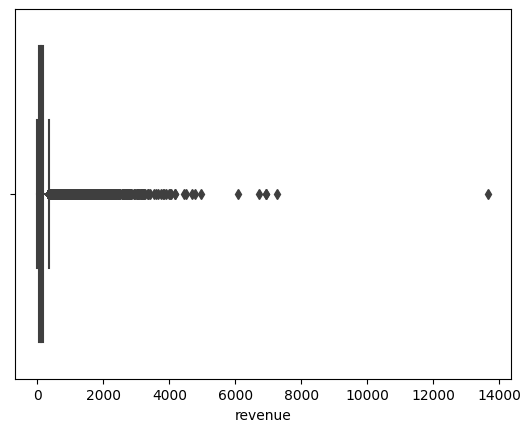

In [39]:
# Membuat histogram revenue
sns.boxplot(data=data_3,x="revenue")

sebelum melakukan imputasi pada outlier kita lihat dahulu data apakah itu yang memiliki revenue yang sangat tinggi dan apakah masuk akal?

In [40]:
data_3.revenue.max()

13664.08

In [41]:
data_3[data_3["revenue"]==13664.08]

,customer_id,order_status,order_delivered_date,customer_city,customer_state,price,freight_cost,payment_type,revenue,product_name,delivered_date,delivered_year,delivered_yearmonth,delivered_dayname,qty
15398,1617b1357756262bfa56ab541c47bc16,Delivered,2017-10-17 18:22:29,Rio De Janeiro,RJ,1680.0,28.01,Credit_Card,13664.08,Fixed_Telephony,2017-10-17,2017-01-01,2017-10-01,Tuesday,8


ternyata product fixed_telephony. maka kita coba lihat data yang serupa memiliki revenue yang seperti bagaimana

In [42]:
data_3[data_3["product_name"]=="Fixed_Telephony"]

,customer_id,order_status,order_delivered_date,customer_city,customer_state,price,freight_cost,payment_type,revenue,product_name,delivered_date,delivered_year,delivered_yearmonth,delivered_dayname,qty
294,94f7f1cb719dd707fd437e918d282537,Delivered,2017-03-01 14:09:10,Diadema,SP,34.99,10.96,Credit_Card,14.89,Fixed_Telephony,2017-03-01,2017-01-01,2017-03-01,Wednesday,0
295,94f7f1cb719dd707fd437e918d282537,Delivered,2017-03-01 14:09:10,Diadema,SP,34.99,10.96,Voucher,31.06,Fixed_Telephony,2017-03-01,2017-01-01,2017-03-01,Wednesday,1
649,4146dd1b456444cd54142b5a7c4b9405,Delivered,2018-05-28 16:38:45,Taiuva,SP,125.00,14.23,Boleto,696.15,Fixed_Telephony,2018-05-28,2018-01-01,2018-05-01,Monday,5
845,dcc13a2d32ff7ec6e1920580280f704c,Delivered,2017-06-29 11:06:37,Pantano Grande,RS,19.99,15.10,Credit_Card,35.09,Fixed_Telephony,2017-06-29,2017-01-01,2017-06-01,Thursday,1
1701,fb31ae52945c45377e1ba9644b7f78e5,Delivered,2018-04-09 19:22:17,Sao Paulo,SP,175.00,14.59,Credit_Card,189.59,Fixed_Telephony,2018-04-09,2018-01-01,2018-04-01,Monday,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112745,8ad46ad4cb8d5301c884b799a72c3d65,Delivered,2018-06-19 23:48:27,Juiz De Fora,MG,18.99,18.23,Credit_Card,37.22,Fixed_Telephony,2018-06-19,2018-01-01,2018-06-01,Tuesday,1
113402,1ad07b0c4441e0b5550631b23fc22312,Delivered,2017-01-31 19:43:50,Campinas,SP,45.00,11.03,Credit_Card,56.03,Fixed_Telephony,2017-01-31,2017-01-01,2017-01-01,Tuesday,1
114319,f8388449b0c4c5425413fd12baf8b3ac,Delivered,2018-04-11 21:27:48,Osasco,SP,104.20,8.49,Credit_Card,112.69,Fixed_Telephony,2018-04-11,2018-01-01,2018-04-01,Wednesday,1
114657,a394adc4a10c887539f7cf0ff32e5e93,Delivered,2018-06-05 19:39:41,Aluminio,SP,33.00,13.71,Credit_Card,46.71,Fixed_Telephony,2018-06-05,2018-01-01,2018-06-01,Tuesday,1


Ternyata setelah dilakukan eksplorasi bahwa hal tersebut masuk akal. Karena mungkin saja telepon yang dibeli oleh user tersebut adalah telepon yang mahal sehingga tidak dilakukan drop rows

## 3.4 Identifikasi lain-lain

Disini diketahui beberapa user melakukan split metode pembayaran dimana mereka membeli 1 unit namun melakukan pembayaran yang berbeda dengan jumlah pembayaran yang beragam contoh pada bari baris index 0-2 user tersebut membeli suatu produk dengan harga produk total (29.99+8.72) = 38.71 namun melakukan pembayaran menggunakan credit card dan voucher jika ditotal (18.12+2.00+18.59) = 38.71. maka menggunakan metode sbb:

* melihat data qty = 0
* membuat kolom baru gross_revenue dengan formula qty * (freight_cost + price)
* mengubah qty = 0 menjadi qty = 1
* buat kolom new_revenue dengan formula qty * (freight_cost + price)
* drop duplicates
* lalu reset index

In [43]:
# melihat data qty = 0
data_3[data_3["qty"]==0]

,customer_id,order_status,order_delivered_date,customer_city,customer_state,price,freight_cost,payment_type,revenue,product_name,delivered_date,delivered_year,delivered_yearmonth,delivered_dayname,qty
0,9ef432eb6251297304e76186b10a928d,Delivered,2017-10-10 21:25:13,Sao Paulo,SP,29.99,8.72,Credit_Card,18.12,Housewares,2017-10-10,2017-01-01,2017-10-01,Tuesday,0
1,9ef432eb6251297304e76186b10a928d,Delivered,2017-10-10 21:25:13,Sao Paulo,SP,29.99,8.72,Voucher,2.00,Housewares,2017-10-10,2017-01-01,2017-10-01,Tuesday,0
2,9ef432eb6251297304e76186b10a928d,Delivered,2017-10-10 21:25:13,Sao Paulo,SP,29.99,8.72,Voucher,18.59,Housewares,2017-10-10,2017-01-01,2017-10-01,Tuesday,0
10,31ad1d1b63eb9962463f764d4e6e0c9d,Delivered,2017-08-16 17:14:30,Sorocaba,SP,149.99,19.77,Credit_Card,8.34,Office_Furniture,2017-08-16,2017-01-01,2017-08-01,Wednesday,0
22,7f8c8b9c2ae27bf3300f670c3d478be8,Delivered,2017-11-08 22:22:00,Feira De Santana,BA,76.00,16.97,Credit_Card,5.96,Telephony,2017-11-08,2017-01-01,2017-11-01,Wednesday,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114798,98058e1fcf55c882ba711cfb5083bff5,Delivered,2018-01-26 12:36:20,Campo Largo,PR,19.90,12.48,Voucher,15.02,Electronics,2018-01-26,2018-01-01,2018-01-01,Friday,0
114862,bb3ef6ad2a44a8b8f5218b23475a0b32,Delivered,2017-08-03 17:23:49,Aracaju,SE,49.00,21.15,Voucher,28.70,Fashion_Bags_Accessories,2017-08-03,2017-01-01,2017-08-01,Thursday,0
114927,48094f58f03bec9519bd0e004ce460df,Delivered,2018-04-30 21:41:07,Belem,PA,49.90,35.71,Credit_Card,28.16,Furniture_Decor,2018-04-30,2018-01-01,2018-04-01,Monday,0
114928,48094f58f03bec9519bd0e004ce460df,Delivered,2018-04-30 21:41:07,Belem,PA,49.90,35.71,Voucher,8.13,Furniture_Decor,2018-04-30,2018-01-01,2018-04-01,Monday,0


In [44]:
# membuat kolom baru gross_revenue dengan formula qty * (freight_cost + price)
data_3["gross_revenue"] = data_3.qty * (data_3.price + data_3.freight_cost)
data_3

,customer_id,order_status,order_delivered_date,customer_city,customer_state,price,freight_cost,payment_type,revenue,product_name,delivered_date,delivered_year,delivered_yearmonth,delivered_dayname,qty,gross_revenue
0,9ef432eb6251297304e76186b10a928d,Delivered,2017-10-10 21:25:13,Sao Paulo,SP,29.99,8.72,Credit_Card,18.12,Housewares,2017-10-10,2017-01-01,2017-10-01,Tuesday,0,0.00
1,9ef432eb6251297304e76186b10a928d,Delivered,2017-10-10 21:25:13,Sao Paulo,SP,29.99,8.72,Voucher,2.00,Housewares,2017-10-10,2017-01-01,2017-10-01,Tuesday,0,0.00
2,9ef432eb6251297304e76186b10a928d,Delivered,2017-10-10 21:25:13,Sao Paulo,SP,29.99,8.72,Voucher,18.59,Housewares,2017-10-10,2017-01-01,2017-10-01,Tuesday,0,0.00
3,b0830fb4747a6c6d20dea0b8c802d7ef,Delivered,2018-08-07 15:27:45,Barreiras,BA,118.70,22.76,Boleto,141.46,Perfumery,2018-08-07,2018-01-01,2018-08-01,Tuesday,1,141.46
4,41ce2a54c0b03bf3443c3d931a367089,Delivered,2018-08-17 18:06:29,Vianopolis,GO,159.90,19.22,Credit_Card,179.12,Auto,2018-08-17,2018-01-01,2018-08-01,Friday,1,179.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115032,39bd1228ee8140590ac3aca26f2dfe00,Delivered,2017-03-17 15:08:01,Sao Jose Dos Campos,SP,72.00,13.08,Credit_Card,85.08,Health_Beauty,2017-03-17,2017-01-01,2017-03-01,Friday,1,85.08
115033,1fca14ff2861355f6e5f14306ff977a7,Delivered,2018-02-28 17:37:56,Praia Grande,SP,174.90,20.10,Credit_Card,195.00,Baby,2018-02-28,2018-01-01,2018-02-01,Wednesday,1,195.00
115034,1aa71eb042121263aafbe80c1b562c9c,Delivered,2017-09-21 11:24:17,Nova Vicosa,BA,205.99,65.02,Credit_Card,271.01,Home_Appliances_2,2017-09-21,2017-01-01,2017-09-01,Thursday,1,271.01
115035,b331b74b18dc79bcdf6532d51e1637c1,Delivered,2018-01-25 23:32:54,Japuiba,RJ,179.99,40.59,Credit_Card,441.16,Computers_Accessories,2018-01-25,2018-01-01,2018-01-01,Thursday,2,441.16


In [45]:
# mengubah qty = 0 menjadi qty = 1
data_3['qty'].mask(data_3['qty'] == 0, 1, inplace=True)
data_3

,customer_id,order_status,order_delivered_date,customer_city,customer_state,price,freight_cost,payment_type,revenue,product_name,delivered_date,delivered_year,delivered_yearmonth,delivered_dayname,qty,gross_revenue
0,9ef432eb6251297304e76186b10a928d,Delivered,2017-10-10 21:25:13,Sao Paulo,SP,29.99,8.72,Credit_Card,18.12,Housewares,2017-10-10,2017-01-01,2017-10-01,Tuesday,1,0.00
1,9ef432eb6251297304e76186b10a928d,Delivered,2017-10-10 21:25:13,Sao Paulo,SP,29.99,8.72,Voucher,2.00,Housewares,2017-10-10,2017-01-01,2017-10-01,Tuesday,1,0.00
2,9ef432eb6251297304e76186b10a928d,Delivered,2017-10-10 21:25:13,Sao Paulo,SP,29.99,8.72,Voucher,18.59,Housewares,2017-10-10,2017-01-01,2017-10-01,Tuesday,1,0.00
3,b0830fb4747a6c6d20dea0b8c802d7ef,Delivered,2018-08-07 15:27:45,Barreiras,BA,118.70,22.76,Boleto,141.46,Perfumery,2018-08-07,2018-01-01,2018-08-01,Tuesday,1,141.46
4,41ce2a54c0b03bf3443c3d931a367089,Delivered,2018-08-17 18:06:29,Vianopolis,GO,159.90,19.22,Credit_Card,179.12,Auto,2018-08-17,2018-01-01,2018-08-01,Friday,1,179.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115032,39bd1228ee8140590ac3aca26f2dfe00,Delivered,2017-03-17 15:08:01,Sao Jose Dos Campos,SP,72.00,13.08,Credit_Card,85.08,Health_Beauty,2017-03-17,2017-01-01,2017-03-01,Friday,1,85.08
115033,1fca14ff2861355f6e5f14306ff977a7,Delivered,2018-02-28 17:37:56,Praia Grande,SP,174.90,20.10,Credit_Card,195.00,Baby,2018-02-28,2018-01-01,2018-02-01,Wednesday,1,195.00
115034,1aa71eb042121263aafbe80c1b562c9c,Delivered,2017-09-21 11:24:17,Nova Vicosa,BA,205.99,65.02,Credit_Card,271.01,Home_Appliances_2,2017-09-21,2017-01-01,2017-09-01,Thursday,1,271.01
115035,b331b74b18dc79bcdf6532d51e1637c1,Delivered,2018-01-25 23:32:54,Japuiba,RJ,179.99,40.59,Credit_Card,441.16,Computers_Accessories,2018-01-25,2018-01-01,2018-01-01,Thursday,2,441.16


In [46]:
# buat kolom new_revenue dengan formula qty * (freight_cost + price)
data_3["new_revenue"] = (data_3.price + data_3.freight_cost) * data_3.qty
data_3

,customer_id,order_status,order_delivered_date,customer_city,customer_state,price,freight_cost,payment_type,revenue,product_name,delivered_date,delivered_year,delivered_yearmonth,delivered_dayname,qty,gross_revenue,new_revenue
0,9ef432eb6251297304e76186b10a928d,Delivered,2017-10-10 21:25:13,Sao Paulo,SP,29.99,8.72,Credit_Card,18.12,Housewares,2017-10-10,2017-01-01,2017-10-01,Tuesday,1,0.00,38.71
1,9ef432eb6251297304e76186b10a928d,Delivered,2017-10-10 21:25:13,Sao Paulo,SP,29.99,8.72,Voucher,2.00,Housewares,2017-10-10,2017-01-01,2017-10-01,Tuesday,1,0.00,38.71
2,9ef432eb6251297304e76186b10a928d,Delivered,2017-10-10 21:25:13,Sao Paulo,SP,29.99,8.72,Voucher,18.59,Housewares,2017-10-10,2017-01-01,2017-10-01,Tuesday,1,0.00,38.71
3,b0830fb4747a6c6d20dea0b8c802d7ef,Delivered,2018-08-07 15:27:45,Barreiras,BA,118.70,22.76,Boleto,141.46,Perfumery,2018-08-07,2018-01-01,2018-08-01,Tuesday,1,141.46,141.46
4,41ce2a54c0b03bf3443c3d931a367089,Delivered,2018-08-17 18:06:29,Vianopolis,GO,159.90,19.22,Credit_Card,179.12,Auto,2018-08-17,2018-01-01,2018-08-01,Friday,1,179.12,179.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115032,39bd1228ee8140590ac3aca26f2dfe00,Delivered,2017-03-17 15:08:01,Sao Jose Dos Campos,SP,72.00,13.08,Credit_Card,85.08,Health_Beauty,2017-03-17,2017-01-01,2017-03-01,Friday,1,85.08,85.08
115033,1fca14ff2861355f6e5f14306ff977a7,Delivered,2018-02-28 17:37:56,Praia Grande,SP,174.90,20.10,Credit_Card,195.00,Baby,2018-02-28,2018-01-01,2018-02-01,Wednesday,1,195.00,195.00
115034,1aa71eb042121263aafbe80c1b562c9c,Delivered,2017-09-21 11:24:17,Nova Vicosa,BA,205.99,65.02,Credit_Card,271.01,Home_Appliances_2,2017-09-21,2017-01-01,2017-09-01,Thursday,1,271.01,271.01
115035,b331b74b18dc79bcdf6532d51e1637c1,Delivered,2018-01-25 23:32:54,Japuiba,RJ,179.99,40.59,Credit_Card,441.16,Computers_Accessories,2018-01-25,2018-01-01,2018-01-01,Thursday,2,441.16,441.16


In [47]:
# drop duplicates
data_4 = data_3.drop_duplicates(subset=["customer_id", "order_status", "order_delivered_date",
                                "customer_city", "customer_state", "price", "freight_cost",
                                "product_name", "qty", "new_revenue"], keep="first")
data_4

,customer_id,order_status,order_delivered_date,customer_city,customer_state,price,freight_cost,payment_type,revenue,product_name,delivered_date,delivered_year,delivered_yearmonth,delivered_dayname,qty,gross_revenue,new_revenue
0,9ef432eb6251297304e76186b10a928d,Delivered,2017-10-10 21:25:13,Sao Paulo,SP,29.99,8.72,Credit_Card,18.12,Housewares,2017-10-10,2017-01-01,2017-10-01,Tuesday,1,0.00,38.71
3,b0830fb4747a6c6d20dea0b8c802d7ef,Delivered,2018-08-07 15:27:45,Barreiras,BA,118.70,22.76,Boleto,141.46,Perfumery,2018-08-07,2018-01-01,2018-08-01,Tuesday,1,141.46,141.46
4,41ce2a54c0b03bf3443c3d931a367089,Delivered,2018-08-17 18:06:29,Vianopolis,GO,159.90,19.22,Credit_Card,179.12,Auto,2018-08-17,2018-01-01,2018-08-01,Friday,1,179.12,179.12
5,f88197465ea7920adcdbec7375364d82,Delivered,2017-12-02 00:28:42,Sao Goncalo Do Amarante,RN,45.00,27.20,Credit_Card,72.20,Pet_Shop,2017-12-02,2017-01-01,2017-12-01,Saturday,1,72.20,72.20
6,8ab97904e6daea8866dbdbc4fb7aad2c,Delivered,2018-02-16 18:17:02,Santo Andre,SP,19.90,8.72,Credit_Card,28.62,Stationery,2018-02-16,2018-01-01,2018-02-01,Friday,1,28.62,28.62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115032,39bd1228ee8140590ac3aca26f2dfe00,Delivered,2017-03-17 15:08:01,Sao Jose Dos Campos,SP,72.00,13.08,Credit_Card,85.08,Health_Beauty,2017-03-17,2017-01-01,2017-03-01,Friday,1,85.08,85.08
115033,1fca14ff2861355f6e5f14306ff977a7,Delivered,2018-02-28 17:37:56,Praia Grande,SP,174.90,20.10,Credit_Card,195.00,Baby,2018-02-28,2018-01-01,2018-02-01,Wednesday,1,195.00,195.00
115034,1aa71eb042121263aafbe80c1b562c9c,Delivered,2017-09-21 11:24:17,Nova Vicosa,BA,205.99,65.02,Credit_Card,271.01,Home_Appliances_2,2017-09-21,2017-01-01,2017-09-01,Thursday,1,271.01,271.01
115035,b331b74b18dc79bcdf6532d51e1637c1,Delivered,2018-01-25 23:32:54,Japuiba,RJ,179.99,40.59,Credit_Card,441.16,Computers_Accessories,2018-01-25,2018-01-01,2018-01-01,Thursday,2,441.16,441.16


In [48]:
data_4[data_4["product_name"]=="Fixed_Telephony"]

,customer_id,order_status,order_delivered_date,customer_city,customer_state,price,freight_cost,payment_type,revenue,product_name,delivered_date,delivered_year,delivered_yearmonth,delivered_dayname,qty,gross_revenue,new_revenue
294,94f7f1cb719dd707fd437e918d282537,Delivered,2017-03-01 14:09:10,Diadema,SP,34.99,10.96,Credit_Card,14.89,Fixed_Telephony,2017-03-01,2017-01-01,2017-03-01,Wednesday,1,0.00,45.95
649,4146dd1b456444cd54142b5a7c4b9405,Delivered,2018-05-28 16:38:45,Taiuva,SP,125.00,14.23,Boleto,696.15,Fixed_Telephony,2018-05-28,2018-01-01,2018-05-01,Monday,5,696.15,696.15
845,dcc13a2d32ff7ec6e1920580280f704c,Delivered,2017-06-29 11:06:37,Pantano Grande,RS,19.99,15.10,Credit_Card,35.09,Fixed_Telephony,2017-06-29,2017-01-01,2017-06-01,Thursday,1,35.09,35.09
1701,fb31ae52945c45377e1ba9644b7f78e5,Delivered,2018-04-09 19:22:17,Sao Paulo,SP,175.00,14.59,Credit_Card,189.59,Fixed_Telephony,2018-04-09,2018-01-01,2018-04-01,Monday,1,189.59,189.59
2133,4023882589774ba137fdea0400aa4857,Delivered,2018-02-02 17:17:47,Rio De Janeiro,RJ,15.30,16.79,Credit_Card,28.60,Fixed_Telephony,2018-02-02,2018-01-01,2018-02-01,Friday,1,32.09,32.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112745,8ad46ad4cb8d5301c884b799a72c3d65,Delivered,2018-06-19 23:48:27,Juiz De Fora,MG,18.99,18.23,Credit_Card,37.22,Fixed_Telephony,2018-06-19,2018-01-01,2018-06-01,Tuesday,1,37.22,37.22
113402,1ad07b0c4441e0b5550631b23fc22312,Delivered,2017-01-31 19:43:50,Campinas,SP,45.00,11.03,Credit_Card,56.03,Fixed_Telephony,2017-01-31,2017-01-01,2017-01-01,Tuesday,1,56.03,56.03
114319,f8388449b0c4c5425413fd12baf8b3ac,Delivered,2018-04-11 21:27:48,Osasco,SP,104.20,8.49,Credit_Card,112.69,Fixed_Telephony,2018-04-11,2018-01-01,2018-04-01,Wednesday,1,112.69,112.69
114657,a394adc4a10c887539f7cf0ff32e5e93,Delivered,2018-06-05 19:39:41,Aluminio,SP,33.00,13.71,Credit_Card,46.71,Fixed_Telephony,2018-06-05,2018-01-01,2018-06-01,Tuesday,1,46.71,46.71


In [49]:
data_5 = data_4.drop(columns=['revenue', 'gross_revenue'])
data_5

,customer_id,order_status,order_delivered_date,customer_city,customer_state,price,freight_cost,payment_type,product_name,delivered_date,delivered_year,delivered_yearmonth,delivered_dayname,qty,new_revenue
0,9ef432eb6251297304e76186b10a928d,Delivered,2017-10-10 21:25:13,Sao Paulo,SP,29.99,8.72,Credit_Card,Housewares,2017-10-10,2017-01-01,2017-10-01,Tuesday,1,38.71
3,b0830fb4747a6c6d20dea0b8c802d7ef,Delivered,2018-08-07 15:27:45,Barreiras,BA,118.70,22.76,Boleto,Perfumery,2018-08-07,2018-01-01,2018-08-01,Tuesday,1,141.46
4,41ce2a54c0b03bf3443c3d931a367089,Delivered,2018-08-17 18:06:29,Vianopolis,GO,159.90,19.22,Credit_Card,Auto,2018-08-17,2018-01-01,2018-08-01,Friday,1,179.12
5,f88197465ea7920adcdbec7375364d82,Delivered,2017-12-02 00:28:42,Sao Goncalo Do Amarante,RN,45.00,27.20,Credit_Card,Pet_Shop,2017-12-02,2017-01-01,2017-12-01,Saturday,1,72.20
6,8ab97904e6daea8866dbdbc4fb7aad2c,Delivered,2018-02-16 18:17:02,Santo Andre,SP,19.90,8.72,Credit_Card,Stationery,2018-02-16,2018-01-01,2018-02-01,Friday,1,28.62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115032,39bd1228ee8140590ac3aca26f2dfe00,Delivered,2017-03-17 15:08:01,Sao Jose Dos Campos,SP,72.00,13.08,Credit_Card,Health_Beauty,2017-03-17,2017-01-01,2017-03-01,Friday,1,85.08
115033,1fca14ff2861355f6e5f14306ff977a7,Delivered,2018-02-28 17:37:56,Praia Grande,SP,174.90,20.10,Credit_Card,Baby,2018-02-28,2018-01-01,2018-02-01,Wednesday,1,195.00
115034,1aa71eb042121263aafbe80c1b562c9c,Delivered,2017-09-21 11:24:17,Nova Vicosa,BA,205.99,65.02,Credit_Card,Home_Appliances_2,2017-09-21,2017-01-01,2017-09-01,Thursday,1,271.01
115035,b331b74b18dc79bcdf6532d51e1637c1,Delivered,2018-01-25 23:32:54,Japuiba,RJ,179.99,40.59,Credit_Card,Computers_Accessories,2018-01-25,2018-01-01,2018-01-01,Thursday,2,441.16


In [50]:
data_5.columns = data_5.columns.str.replace('new_revenue', 'revenue')
data_5

,customer_id,order_status,order_delivered_date,customer_city,customer_state,price,freight_cost,payment_type,product_name,delivered_date,delivered_year,delivered_yearmonth,delivered_dayname,qty,revenue
0,9ef432eb6251297304e76186b10a928d,Delivered,2017-10-10 21:25:13,Sao Paulo,SP,29.99,8.72,Credit_Card,Housewares,2017-10-10,2017-01-01,2017-10-01,Tuesday,1,38.71
3,b0830fb4747a6c6d20dea0b8c802d7ef,Delivered,2018-08-07 15:27:45,Barreiras,BA,118.70,22.76,Boleto,Perfumery,2018-08-07,2018-01-01,2018-08-01,Tuesday,1,141.46
4,41ce2a54c0b03bf3443c3d931a367089,Delivered,2018-08-17 18:06:29,Vianopolis,GO,159.90,19.22,Credit_Card,Auto,2018-08-17,2018-01-01,2018-08-01,Friday,1,179.12
5,f88197465ea7920adcdbec7375364d82,Delivered,2017-12-02 00:28:42,Sao Goncalo Do Amarante,RN,45.00,27.20,Credit_Card,Pet_Shop,2017-12-02,2017-01-01,2017-12-01,Saturday,1,72.20
6,8ab97904e6daea8866dbdbc4fb7aad2c,Delivered,2018-02-16 18:17:02,Santo Andre,SP,19.90,8.72,Credit_Card,Stationery,2018-02-16,2018-01-01,2018-02-01,Friday,1,28.62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115032,39bd1228ee8140590ac3aca26f2dfe00,Delivered,2017-03-17 15:08:01,Sao Jose Dos Campos,SP,72.00,13.08,Credit_Card,Health_Beauty,2017-03-17,2017-01-01,2017-03-01,Friday,1,85.08
115033,1fca14ff2861355f6e5f14306ff977a7,Delivered,2018-02-28 17:37:56,Praia Grande,SP,174.90,20.10,Credit_Card,Baby,2018-02-28,2018-01-01,2018-02-01,Wednesday,1,195.00
115034,1aa71eb042121263aafbe80c1b562c9c,Delivered,2017-09-21 11:24:17,Nova Vicosa,BA,205.99,65.02,Credit_Card,Home_Appliances_2,2017-09-21,2017-01-01,2017-09-01,Thursday,1,271.01
115035,b331b74b18dc79bcdf6532d51e1637c1,Delivered,2018-01-25 23:32:54,Japuiba,RJ,179.99,40.59,Credit_Card,Computers_Accessories,2018-01-25,2018-01-01,2018-01-01,Thursday,2,441.16


In [51]:
# reset index
data_6 = data_5.reset_index(drop=True)
data_6

,customer_id,order_status,order_delivered_date,customer_city,customer_state,price,freight_cost,payment_type,product_name,delivered_date,delivered_year,delivered_yearmonth,delivered_dayname,qty,revenue
0,9ef432eb6251297304e76186b10a928d,Delivered,2017-10-10 21:25:13,Sao Paulo,SP,29.99,8.72,Credit_Card,Housewares,2017-10-10,2017-01-01,2017-10-01,Tuesday,1,38.71
1,b0830fb4747a6c6d20dea0b8c802d7ef,Delivered,2018-08-07 15:27:45,Barreiras,BA,118.70,22.76,Boleto,Perfumery,2018-08-07,2018-01-01,2018-08-01,Tuesday,1,141.46
2,41ce2a54c0b03bf3443c3d931a367089,Delivered,2018-08-17 18:06:29,Vianopolis,GO,159.90,19.22,Credit_Card,Auto,2018-08-17,2018-01-01,2018-08-01,Friday,1,179.12
3,f88197465ea7920adcdbec7375364d82,Delivered,2017-12-02 00:28:42,Sao Goncalo Do Amarante,RN,45.00,27.20,Credit_Card,Pet_Shop,2017-12-02,2017-01-01,2017-12-01,Saturday,1,72.20
4,8ab97904e6daea8866dbdbc4fb7aad2c,Delivered,2018-02-16 18:17:02,Santo Andre,SP,19.90,8.72,Credit_Card,Stationery,2018-02-16,2018-01-01,2018-02-01,Friday,1,28.62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99592,39bd1228ee8140590ac3aca26f2dfe00,Delivered,2017-03-17 15:08:01,Sao Jose Dos Campos,SP,72.00,13.08,Credit_Card,Health_Beauty,2017-03-17,2017-01-01,2017-03-01,Friday,1,85.08
99593,1fca14ff2861355f6e5f14306ff977a7,Delivered,2018-02-28 17:37:56,Praia Grande,SP,174.90,20.10,Credit_Card,Baby,2018-02-28,2018-01-01,2018-02-01,Wednesday,1,195.00
99594,1aa71eb042121263aafbe80c1b562c9c,Delivered,2017-09-21 11:24:17,Nova Vicosa,BA,205.99,65.02,Credit_Card,Home_Appliances_2,2017-09-21,2017-01-01,2017-09-01,Thursday,1,271.01
99595,b331b74b18dc79bcdf6532d51e1637c1,Delivered,2018-01-25 23:32:54,Japuiba,RJ,179.99,40.59,Credit_Card,Computers_Accessories,2018-01-25,2018-01-01,2018-01-01,Thursday,2,441.16


# 4. Analysis

In [52]:
# data yang sudah bersih diberi variabel baru
data = data_6
data

,customer_id,order_status,order_delivered_date,customer_city,customer_state,price,freight_cost,payment_type,product_name,delivered_date,delivered_year,delivered_yearmonth,delivered_dayname,qty,revenue
0,9ef432eb6251297304e76186b10a928d,Delivered,2017-10-10 21:25:13,Sao Paulo,SP,29.99,8.72,Credit_Card,Housewares,2017-10-10,2017-01-01,2017-10-01,Tuesday,1,38.71
1,b0830fb4747a6c6d20dea0b8c802d7ef,Delivered,2018-08-07 15:27:45,Barreiras,BA,118.70,22.76,Boleto,Perfumery,2018-08-07,2018-01-01,2018-08-01,Tuesday,1,141.46
2,41ce2a54c0b03bf3443c3d931a367089,Delivered,2018-08-17 18:06:29,Vianopolis,GO,159.90,19.22,Credit_Card,Auto,2018-08-17,2018-01-01,2018-08-01,Friday,1,179.12
3,f88197465ea7920adcdbec7375364d82,Delivered,2017-12-02 00:28:42,Sao Goncalo Do Amarante,RN,45.00,27.20,Credit_Card,Pet_Shop,2017-12-02,2017-01-01,2017-12-01,Saturday,1,72.20
4,8ab97904e6daea8866dbdbc4fb7aad2c,Delivered,2018-02-16 18:17:02,Santo Andre,SP,19.90,8.72,Credit_Card,Stationery,2018-02-16,2018-01-01,2018-02-01,Friday,1,28.62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99592,39bd1228ee8140590ac3aca26f2dfe00,Delivered,2017-03-17 15:08:01,Sao Jose Dos Campos,SP,72.00,13.08,Credit_Card,Health_Beauty,2017-03-17,2017-01-01,2017-03-01,Friday,1,85.08
99593,1fca14ff2861355f6e5f14306ff977a7,Delivered,2018-02-28 17:37:56,Praia Grande,SP,174.90,20.10,Credit_Card,Baby,2018-02-28,2018-01-01,2018-02-01,Wednesday,1,195.00
99594,1aa71eb042121263aafbe80c1b562c9c,Delivered,2017-09-21 11:24:17,Nova Vicosa,BA,205.99,65.02,Credit_Card,Home_Appliances_2,2017-09-21,2017-01-01,2017-09-01,Thursday,1,271.01
99595,b331b74b18dc79bcdf6532d51e1637c1,Delivered,2018-01-25 23:32:54,Japuiba,RJ,179.99,40.59,Credit_Card,Computers_Accessories,2018-01-25,2018-01-01,2018-01-01,Thursday,2,441.16


## 4.1 Analisis Trend Sales/Revenue

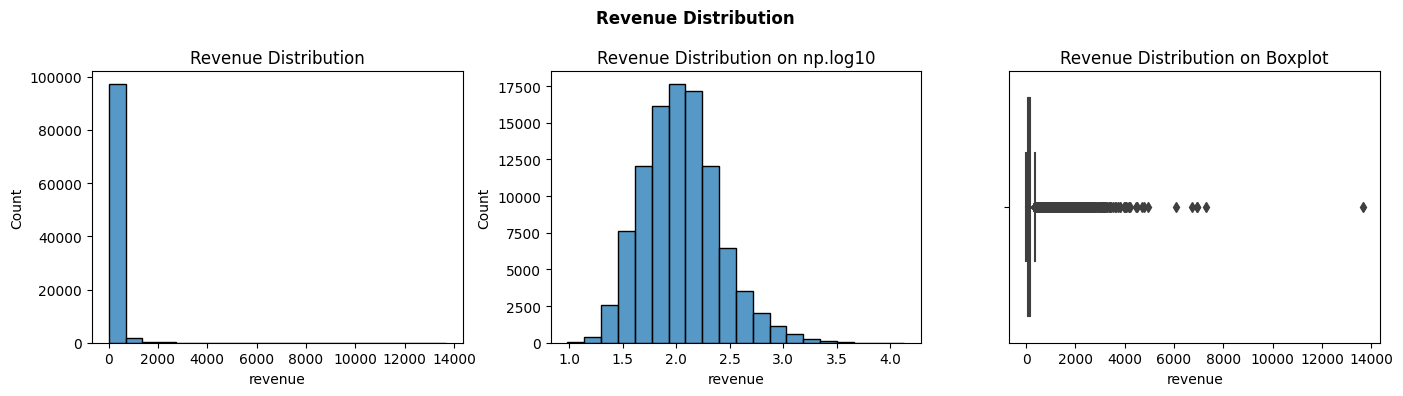

In [53]:
# Sebaran Data Revenue

# Membuat Plot
fig, ax = plt.subplots(figsize=(14, 4), ncols=3, nrows=1)

# Plot
sns.histplot(data=data, 
             x="revenue", 
             bins=20,
             ax=ax[0])

sns.histplot(data=data, 
             x=np.log10(data["revenue"]), 
             bins=20,
             ax=ax[1])

sns.boxplot(data=data, 
            x="revenue", 
            ax=ax[2])

# Kustomisasi             
ax[0].set(title="Revenue Distribution")
ax[1].set(title="Revenue Distribution on np.log10")
ax[2].set(title="Revenue Distribution on Boxplot")
fig.suptitle("Revenue Distribution", fontweight="bold")
plt.tight_layout()

plt.show()

In [54]:
# Deskripsi statistik Pendapatan/Revenue
pd.DataFrame(data["revenue"].describe().round(2))

,revenue
count,99597.00
mean,162.74
std,220.56
min,9.59
25%,62.67
50%,106.85
75%,180.25
max,13664.08


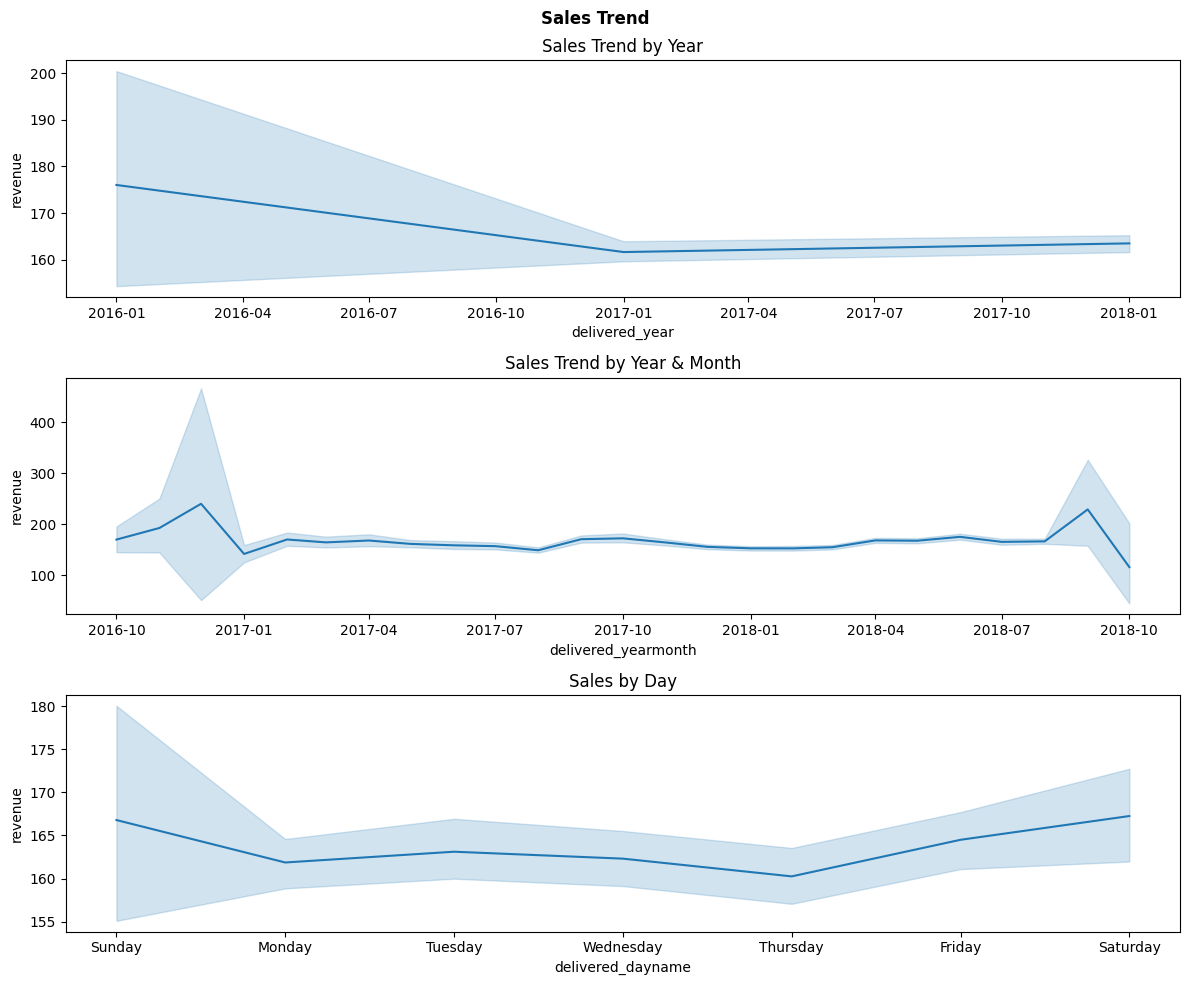

In [55]:
data["delivered_dayname"] = pd.Categorical(data["delivered_dayname"],
                                   categories=["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"],
                                   ordered=True)


fig, ax = plt.subplots(figsize=(12,10), ncols=1, nrows=3)

sns.lineplot(data=data, x="delivered_year", y="revenue", ax=ax[0])
sns.lineplot(data=data, x="delivered_yearmonth", y="revenue", ax=ax[1])
sns.lineplot(data=data, x="delivered_dayname", y="revenue", ax=ax[2])

ax[0].set(title="Sales Trend by Year")
ax[1].set(title="Sales Trend by Year & Month")
ax[2].set(title="Sales by Day")
fig.suptitle("Sales Trend", fontweight="bold")

plt.tight_layout()
plt.show()

## 4.2 Analisis Produk

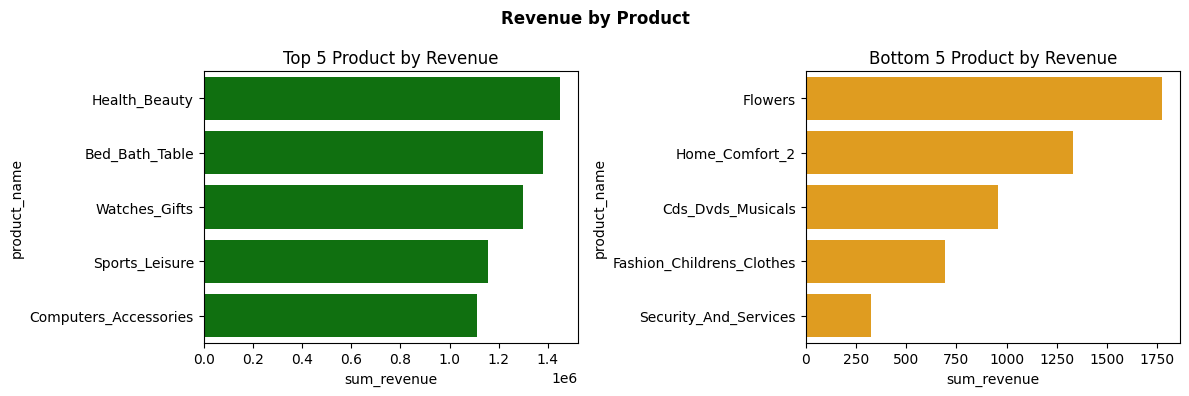

In [56]:
# Membuat Plot
fig, ax = plt.subplots(figsize=(12, 4), ncols=2, nrows=1)

# Plot
sns.barplot(data=data.groupby(['product_name']).agg(sum_revenue=("revenue", 'sum')).sort_values(ascending=False, by="sum_revenue").head().reset_index(), 
             x="sum_revenue", 
             y="product_name",
             ax=ax[0],
             color="green")

sns.barplot(data=data.groupby(['product_name']).agg(sum_revenue=("revenue", 'sum')).sort_values(ascending=False, by="sum_revenue").tail().reset_index(), 
             x="sum_revenue", 
             y="product_name",
             ax=ax[1],
             color="orange")

# Kustomisasi             
ax[0].set(title="Top 5 Product by Revenue")
ax[1].set(title="Bottom 5 Product by Revenue")
fig.suptitle("Revenue by Product", fontweight="bold")

plt.tight_layout()
plt.show()

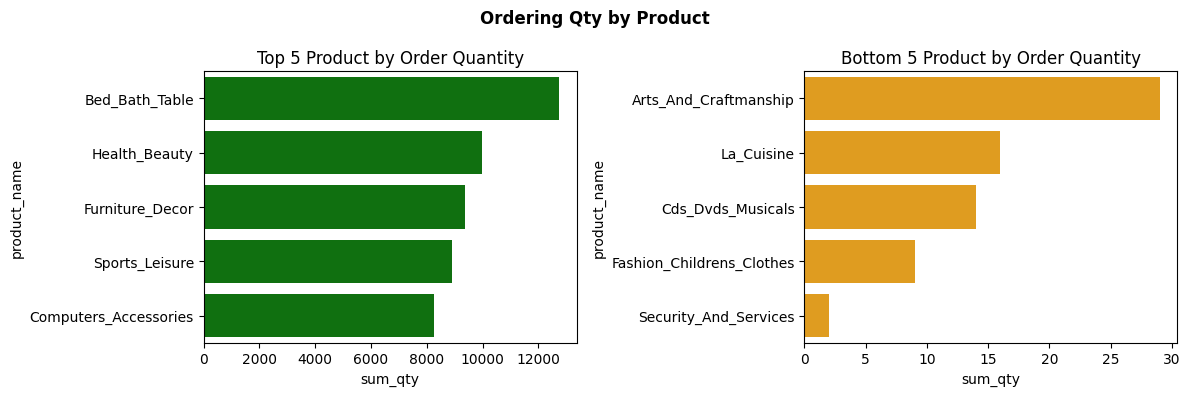

In [57]:
# Membuat Plot
fig, ax = plt.subplots(figsize=(12, 4), ncols=2, nrows=1)

# Plot
sns.barplot(data=data.groupby(['product_name']).agg(sum_qty=("qty", 'sum')).sort_values(ascending=False, by="sum_qty").head().reset_index(), 
             x="sum_qty", 
             y="product_name",
             ax=ax[0],
             color="green")

sns.barplot(data=data.groupby(['product_name']).agg(sum_qty=("qty", 'sum')).sort_values(ascending=False, by="sum_qty").tail().reset_index(), 
             x="sum_qty", 
             y="product_name",
             ax=ax[1],
             color="orange")

# Kustomisasi             
ax[0].set(title="Top 5 Product by Order Quantity")
ax[1].set(title="Bottom 5 Product by Order Quantity")
fig.suptitle("Ordering Qty by Product", fontweight="bold")

plt.tight_layout()
plt.show()

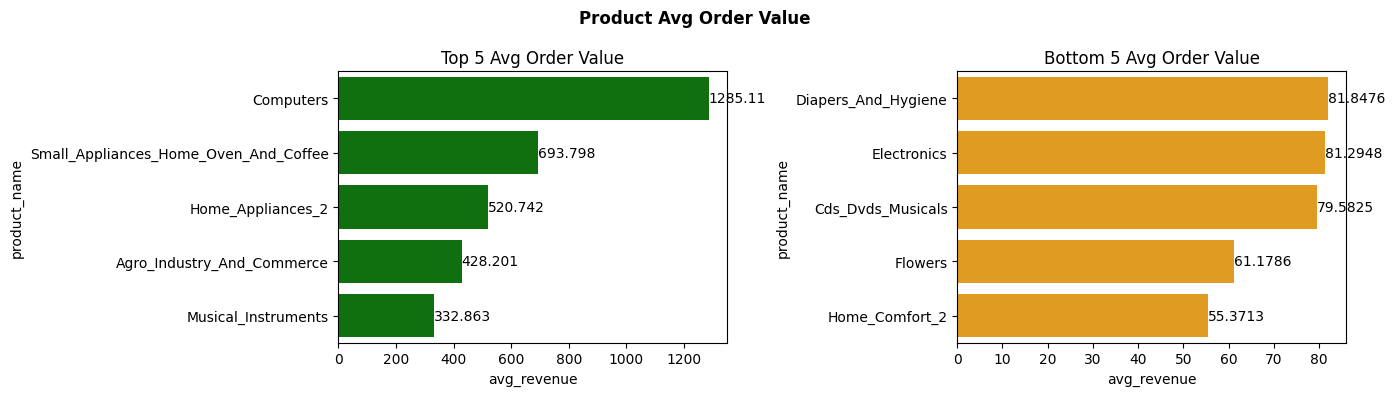

In [58]:
# Membuat Plot
fig, ax = plt.subplots(figsize=(14, 4), ncols=2, nrows=1)

# Plot
sns.barplot(data=data.groupby(['product_name']).agg(avg_revenue=("revenue", 'mean')).sort_values(ascending=False, by="avg_revenue").head().reset_index(), 
             x="avg_revenue", 
             y="product_name",
             ax=ax[0],
             color="green")

sns.barplot(data=data.groupby(['product_name']).agg(avg_revenue=("revenue", 'mean')).sort_values(ascending=False, by="avg_revenue").tail().reset_index(), 
             x="avg_revenue", 
             y="product_name",
             ax=ax[1],
             color="orange")

# Kustomisasi             
ax[0].set(title="Top 5 Avg Order Value")
ax[0].bar_label(ax[0].containers[0])
ax[1].set(title="Bottom 5 Avg Order Value")
ax[1].bar_label(ax[1].containers[0])
fig.suptitle("Product Avg Order Value", fontweight="bold")

plt.tight_layout()
plt.show()

## 4.3 Analisis Customer

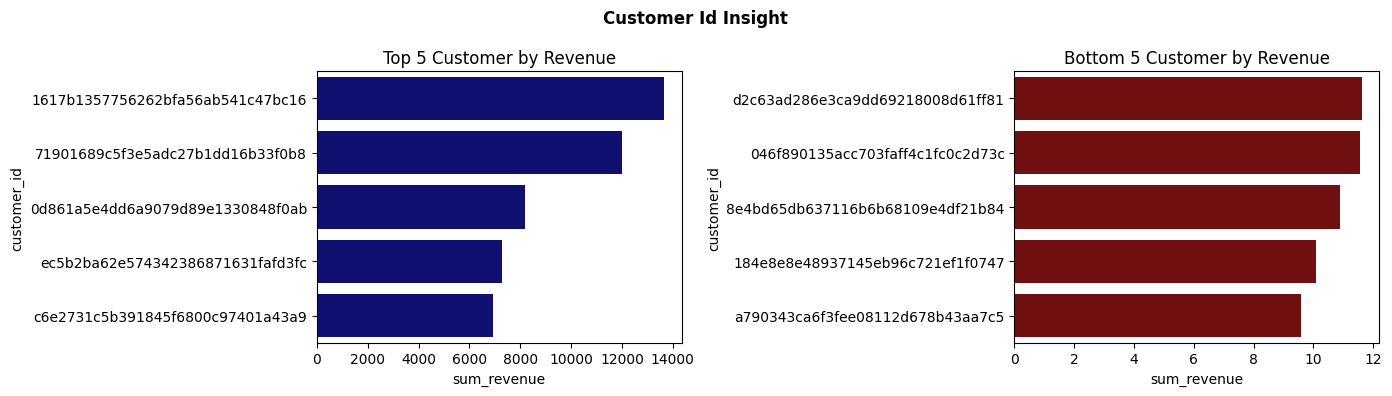

In [59]:
# Membuat Plot
fig, ax = plt.subplots(figsize=(14, 4), ncols=2, nrows=1)

# Plot
sns.barplot(data=data.groupby(['customer_id']).agg(sum_revenue=("revenue", 'sum')).sort_values(ascending=False, by="sum_revenue").head().reset_index(), 
             x="sum_revenue", 
             y="customer_id",
             ax=ax[0],
             color="navy")

sns.barplot(data=data.groupby(['customer_id']).agg(sum_revenue=("revenue", 'sum')).sort_values(ascending=False, by="sum_revenue").tail().reset_index(), 
             x="sum_revenue", 
             y="customer_id",
             ax=ax[1],
             color="maroon")

# Kustomisasi             
ax[0].set(title="Top 5 Customer by Revenue")
ax[1].set(title="Bottom 5 Customer by Revenue")
fig.suptitle("Customer Id Insight", fontweight="bold")

plt.tight_layout()
plt.show()

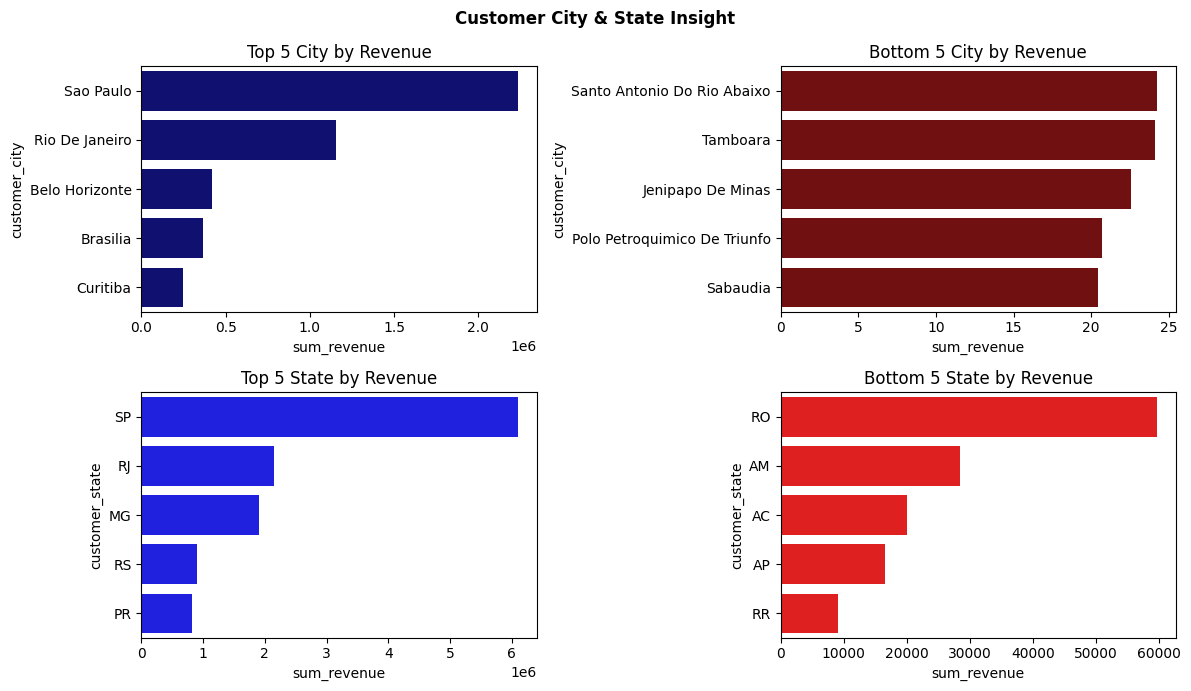

In [60]:
# Membuat Plot
fig, ax = plt.subplots(figsize=(12, 7), ncols=2, nrows=2)

# Plot
sns.barplot(data=data.groupby(['customer_city']).agg(sum_revenue=("revenue", 'sum')).sort_values(ascending=False, by="sum_revenue").head().reset_index(),
            x="sum_revenue",
            y="customer_city",
            ax=ax[0,0],
            color="navy")

sns.barplot(data=data.groupby(['customer_city']).agg(sum_revenue=("revenue", 'sum')).sort_values(ascending=False, by="sum_revenue").tail().reset_index(), 
            x="sum_revenue",
            y="customer_city",
            ax=ax[0, 1],
            color="maroon")

sns.barplot(data=data.groupby(['customer_state']).agg(sum_revenue=("revenue", 'sum')).sort_values(ascending=False, by="sum_revenue").head().reset_index(),
            x="sum_revenue",
            y="customer_state",
            ax=ax[1, 0],
            color="blue")

sns.barplot(data=data.groupby(['customer_state']).agg(sum_revenue=("revenue", 'sum')).sort_values(ascending=False, by="sum_revenue").tail().reset_index(),
            x="sum_revenue",
            y="customer_state",
            ax=ax[1, 1],
            color="red")

# Kustomisasi             
ax[0,0].set(title="Top 5 City by Revenue")
ax[0,1].set(title="Bottom 5 City by Revenue")
ax[1,0].set(title="Top 5 State by Revenue")
ax[1,1].set(title="Bottom 5 State by Revenue")
fig.suptitle("Customer City & State Insight", fontweight="bold")

plt.tight_layout()
plt.show()

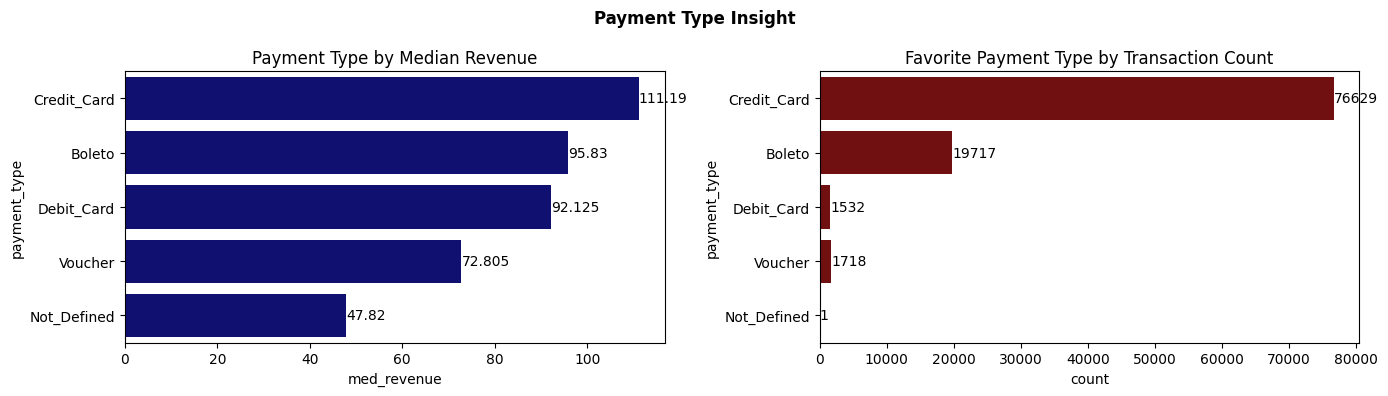

In [61]:
# Membuat Plot
fig, ax = plt.subplots(figsize=(14, 4), ncols=2, nrows=1)

# Plot
sns.barplot(data=data.groupby(['payment_type']).agg(med_revenue=("revenue", 'median')).sort_values(ascending=False, by="med_revenue").head().reset_index(), 
             x="med_revenue", 
             y="payment_type",
             ax=ax[0],
             color="navy")

sns.countplot(data=data,
             y="payment_type",
             ax=ax[1],
             color="maroon")

# Kustomisasi             
ax[0].set(title="Payment Type by Median Revenue")
ax[0].bar_label(ax[0].containers[0])
ax[1].set(title="Favorite Payment Type by Transaction Count")
ax[1].bar_label(ax[1].containers[0])
fig.suptitle("Payment Type Insight", fontweight="bold")

plt.tight_layout()
plt.show()